In [84]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
import lmfit


In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [27]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


In [130]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self,t):
        velocity_noise = None
        accel = None
        cruise = None
        decel = None
        idle = None
        t_DP = None
        self.t = t
        print(self.t)
        self.y = None

    def subtract_avg(self, y):
        """Removes the average speed from the observations
        """
        self.y = y - y.mean()
        return y - y.mean()
     

    def fnc2min(self, params):
        """ Returns the residuals for the model
        """

        A_FS = params['A_FS']
        w_FS = params['w_FS']
        gamma_FS = params['gamma_FS']

        model = A_FS * np.sin( (w_FS*self.t) + gamma_FS )

        return (self.y - model)



    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        # LMFitmin = Minimizer(self.fnc2min, LMparams)#, fcn_args=(t, yNoisy))
        # LMFitResult = LMFitmin.minimize(method='least_squares')
        LMFitResult = lmfit.minimize(self.fnc2min, LMparams, method='least_squares')
        # LSOptimResult = least_squares(self.fnc2min, InitialParams, method='lm', args=(variables, yNoisy))

        return LMFitResult

    def LF_Noise(self):
        """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0, max = 0.01*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    def MF_Noise(self):
        """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0.01, max = 0.25*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    def HF_Noise(self):
        """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0.25, max = 0.5*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)



    def velocity_noise(self):
        A_FS = Symbol('A/_FS')
        print(Ai_FS)
        #EQN 5
        y_FS[t] = Sum(A_FS[i]*sin(w_FS[i][t]+gamma_FS[i]), (i, 1, 3))

        pass


/Users/koeboonshyang/Documents/GitHub/MEng-V2I
<class 'numpy.ndarray'>
<generator object <genexpr> at 0x1a3daaf7d0>
<class 'numpy.ndarray'>


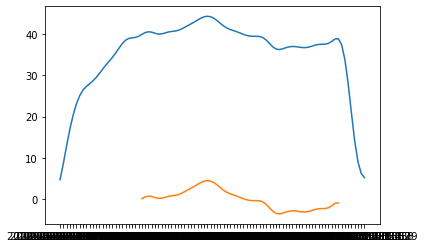

In [131]:
if __name__ == '__main__':
    LMparams = Parameters()
    LMparams.add('A_FS', value = 1.)
    LMparams.add('w_FS', value = 1., min = 0, max = 0.01*2*math.pi)
    LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    

    # print(os.getcwd())
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long cruising period
    data = data.iloc[1002:1096,:]
    data.reindex()
    # print(data)
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    # plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a list of just t values starting at t=1
    t = np.array(i+1 for i in range(len(cruising_data)))
    print(type(t))
    dp_obj = DP(t)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = dp_obj.subtract_avg(cruising_data.loc[:,'speed_mph']).to_numpy()
    # print(type(y))
    plt.plot(cruising_data.loc[:,'timestamp'], y)
    # plt.show()

    print(type(dp_obj.t))

    # # perform NLLSR on the first values with the initial parameters suggested by LMParams
    # hi = dp_obj.NLLSR(LMparams)#, t, y)
    # #prints the parameters of the result
    # print(hi.params)

    # plt.plot(t,y,'b')
    # plt.plot(t, dp_obj.fnc2min(hi.params),'r', label = 'best_fit')
    # plt.show()

    # # perform NLLSR on the first values with the initial parameters suggested by LMParams
    # hi = dp_obj.NLLSR(LMparams, t[1], y[1])
    # #prints the parameters of the result
    # print(hi.params)




In [137]:
x = np.array(i+1 for i in range(len(cruising_data)))
temp = np.array(cruising_data.loc[:,'speed_mph'])
print(temp)
y = temp- temp.mean()
print(y)
plt.plot(x, y, 'b')
plt.show()


[39.87507429 40.30870498 40.50952323 40.40810951 40.14575846 39.95840745
 39.98906227 40.19665145 40.42715731 40.57187465 40.66465762 40.82849709
 41.13854174 41.55662194 41.99687475 42.42313953 42.86138353 43.33043116
 43.78348187 44.12261902 44.25677104 44.13802108 43.76502979 43.18839251
 42.51770772 41.88995474 41.4002972  41.0539432  40.78258902 40.50870488
 40.20208252 39.88995428 39.62842149 39.46488003 39.41034173 39.41733617
 39.36398814 39.08787197 38.49657708 37.67485071 36.86912158 36.34099678
 36.20476185 36.37499995 36.65520807 36.87507385 36.95959742 36.91525203
 36.79694838 36.68854061 36.67737997 36.809151   37.04992502 37.29791614
 37.45208275 37.49233572 37.51584776 37.70185984 38.17403248 38.76041624
 38.83243988]
[ 0.17543208  0.60906278  0.80988103  0.70846731  0.44611626  0.25876525
  0.28942006  0.49700924  0.7275151   0.87223245  0.96501541  1.12885489
  1.43889953  1.85697974  2.29723255  2.72349732  3.16174132  3.63078895
  4.08383967  4.42297682  4.55712883 

RuntimeError: matplotlib does not support generators as input

In [123]:
import lmfit
p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3., True))

class hi(object):
    def __init__(self,x,y):
        self.count = 0
        self.x = x
        # print(self.x)
        self.y = y

    def residual(self,p):
        # print(self.count)
        # self.count += 1
        v = p.valuesdict()
        # print(len(v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y))
        return v['a1'] * np.exp(-self.x / v['t1']) + v['a2'] * np.exp(-(self.x - 0.1) / v['t2']) - self.y

hihi = hi(x,y)
print(hihi.x)
mi = lmfit.minimize(hihi.residual, p, method='nelder', nan_policy='omit')
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)

[ 1.          1.03614458  1.07228916  1.10843373  1.14457831  1.18072289
  1.21686747  1.25301205  1.28915663  1.3253012   1.36144578  1.39759036
  1.43373494  1.46987952  1.5060241   1.54216867  1.57831325  1.61445783
  1.65060241  1.68674699  1.72289157  1.75903614  1.79518072  1.8313253
  1.86746988  1.90361446  1.93975904  1.97590361  2.01204819  2.04819277
  2.08433735  2.12048193  2.15662651  2.19277108  2.22891566  2.26506024
  2.30120482  2.3373494   2.37349398  2.40963855  2.44578313  2.48192771
  2.51807229  2.55421687  2.59036145  2.62650602  2.6626506   2.69879518
  2.73493976  2.77108434  2.80722892  2.84337349  2.87951807  2.91566265
  2.95180723  2.98795181  3.02409639  3.06024096  3.09638554  3.13253012
  3.1686747   3.20481928  3.24096386  3.27710843  3.31325301  3.34939759
  3.38554217  3.42168675  3.45783133  3.4939759   3.53012048  3.56626506
  3.60240964  3.63855422  3.6746988   3.71084337  3.74698795  3.78313253
  3.81927711  3.85542169  3.89156627  3.92771084  3.

610
250


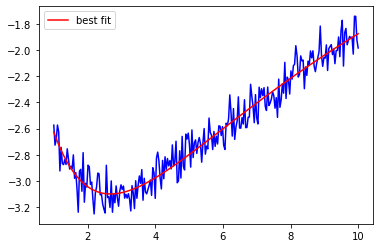

In [110]:
plt.plot(x, y, 'b')
plt.plot(x, hihi.residual(mi.params) + y, 'r', label='best fit')
plt.legend(loc='best')
plt.show()